# Library

Pertama kita import library yang dibutuhkan untuk membuat model prediksi harga rumah

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Dataset

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"viddyvirstandi","key":"86d946a7376992a06910054f40eda766"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d nafisbarizki/daftar-harga-rumah-jabodetabek

Dataset URL: https://www.kaggle.com/datasets/nafisbarizki/daftar-harga-rumah-jabodetabek
License(s): unknown
  0% 0.00/226k [00:00<?, ?B/s]
100% 226k/226k [00:00<00:00, 616MB/s]


Import dataset yang di download dari Kaggle

In [5]:
!unzip daftar-harga-rumah-jabodetabek.zip

Archive:  daftar-harga-rumah-jabodetabek.zip
  inflating: jabodetabek_house_price.csv  


Hasil dari download tadi berupa ZIP makadari itu kita perlu melakukan unzip supaya dataset dapat digunakan

In [6]:
df = pd.read_csv('jabodetabek_house_price.csv')

In [7]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 3553
Number of columns: 27


Insight

---
Dari code diatas dapat kita ketahui kalau dataset yang digunakan terdiri dari 3553 data dan 27 kolom


# Exploratory Data Analysis (EDA)

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

In [8]:
df.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [10]:
df.shape

(3553, 27)

In [11]:
df.isnull().sum()

,0
url,0
price_in_rp,0
title,0
address,0
district,0
city,0
lat,0
long,0
facilities,0
property_type,1


In [12]:
df.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000


In [13]:
df.duplicated().sum()

np.int64(0)

Insight
---

Dari info diatas, tidak terdapat data duplikat pada dataset, namun sepertinya masih ada data yanag kosong

# **Pre cleaning**

In [14]:
df_clean = df.copy()

Kolom 'url', 'title', 'address', 'ads_id', 'year_built' tidak relevan untuk membuat model, oleh karena itu kita drop kolomnya

In [15]:
# Drop kolom yang tidak relevan untuk prediksi harga
drop_cols = ['url', 'title', 'address', 'ads_id', 'year_built']
df_clean.drop(columns=drop_cols, inplace=True)

## Memperbaiki tipe data

Dari info df diatas dapat kita lihat kalau kolom 'bedrooms', 'bathrooms', 'maid_bedrooms', 'maid_bathrooms','floors', 'building_age', 'garages', 'carports' masih berupa float64, untuk pembuatan model kita ganti tipe datanya menjadi Integer

In [16]:
# Kolom numerik yang harusnya integer
int_cols = [
    'bedrooms', 'bathrooms', 'maid_bedrooms', 'maid_bathrooms',
    'floors', 'building_age', 'garages', 'carports'
]
for col in int_cols:
    df_clean[col] = df_clean[col].astype('Int64')

Dan untuk kolom 'district', 'city', 'property_type', 'certificate', 'property_condition', 'building_orientation', 'furnishing'kita ubah juga menjadi category

In [17]:
# Kolom kategori
cat_cols = [
    'district', 'city', 'property_type', 'certificate',
    'property_condition', 'building_orientation', 'furnishing'
]
for col in cat_cols:
    df_clean[col] = df_clean[col].astype('category')

In [18]:
df_clean['electricity'] = (df_clean['electricity'].astype(str).str.extract(r'(\d+)').astype('Int64'))

In [19]:
df_clean.head()

,price_in_rp,district,city,lat,long,facilities,property_type,bedrooms,bathrooms,land_size_m2,...,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,property_condition,building_orientation,garages,furnishing
0,2.990000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,4,4,239.0,...,shm - sertifikat hak milik,4400,0,1,2,5,bagus,NaN,0,unfurnished
1,1.270000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,3,2,55.0,...,hgb - hak guna bangunan,2200,0,0,2,<NA>,bagus,NaN,0,NaN
2,1.950000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,3,3,119.0,...,hgb - hak guna bangunan,2200,1,1,2,<NA>,bagus,NaN,1,unfurnished
3,3.300000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,3,3,180.0,...,shm - sertifikat hak milik,3500,1,1,2,6,bagus sekali,utara,2,unfurnished
4,4.500000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,4,3,328.0,...,shm - sertifikat hak milik,3500,1,1,2,9,bagus,utara,1,unfurnished


In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   price_in_rp           3553 non-null   float64 
 1   district              3553 non-null   category
 2   city                  3553 non-null   category
 3   lat                   3553 non-null   float64 
 4   long                  3553 non-null   float64 
 5   facilities            3553 non-null   object  
 6   property_type         3552 non-null   category
 7   bedrooms              3519 non-null   Int64   
 8   bathrooms             3524 non-null   Int64   
 9   land_size_m2          3551 non-null   float64 
 10  building_size_m2      3551 non-null   float64 
 11  carports              3553 non-null   Int64   
 12  certificate           3412 non-null   category
 13  electricity           3259 non-null   Int64   
 14  maid_bedrooms         3553 non-null   Int64   
 15  maid

In [21]:
print("Kolom setelah pre-cleaning:")
print(df_clean.columns.tolist())

Kolom setelah pre-cleaning:
['price_in_rp', 'district', 'city', 'lat', 'long', 'facilities', 'property_type', 'bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'carports', 'certificate', 'electricity', 'maid_bedrooms', 'maid_bathrooms', 'floors', 'building_age', 'property_condition', 'building_orientation', 'garages', 'furnishing']


Setelah selesai memperbaiki tipe data, maka kolom 'price_in_rp', 'district', 'city', 'lat', 'long', 'facilities', 'property_type', 'bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'carports', 'certificate', 'electricity', 'maid_bedrooms', 'maid_bathrooms', 'floors', 'building_age', 'property_condition', 'building_orientation', 'garages', 'furnishing' siap digunakan dalam pembuatan model

In [22]:
# Mengambil salah satu kolom secara acak

pd.set_option('display.max_columns', None)
df_clean.iloc[0]

,0
price_in_rp,2990000000.0
district,Summarecon Bekasi
city,Bekasi
lat,-6.223945
long,106.986275
facilities,"Tempat Jemuran, Jalur Telepon, Taman, Taman"
property_type,rumah
bedrooms,4
bathrooms,4
land_size_m2,239.0


# EDA Univariate

## **Distrbusi Harga Rumah**

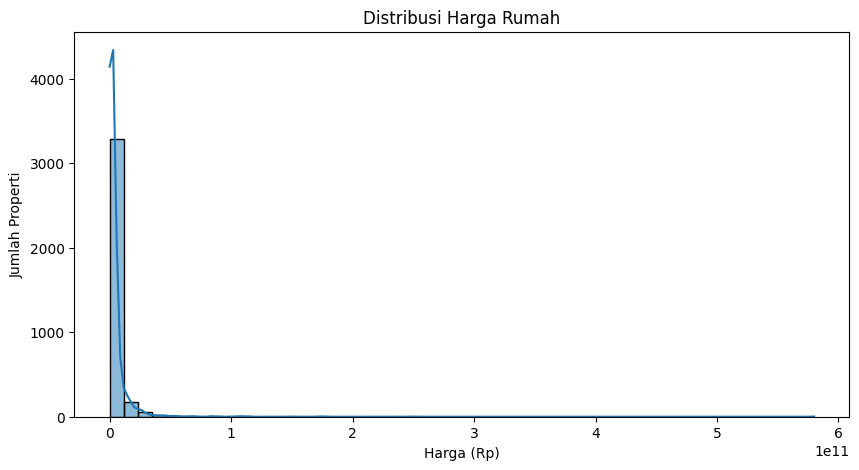

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['price_in_rp'], bins=50, kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga (Rp)')
plt.ylabel('Jumlah Properti')
plt.show()

insight

---
Dari plot diatas dapat kita lihat grafik distribusi harga rumah menunjukkan bahwa mayoritas rumah yang dijual berada pada rentang harga di bawah Rp 10 miliar. Distribusi bersifat miring ke kanan (right-skewed), dengan sedikit rumah yang memiliki harga ekstrem hingga mencapai lebih dari Rp 100 miliar. Hal ini mengindikasikan adanya outlier dalam data, serta pentingnya mempertimbangkan transformasi data seperti logaritma saat membangun model prediksi agar performa model tidak terdistorsi oleh harga ekstrem.

## **Distribusi numerik**

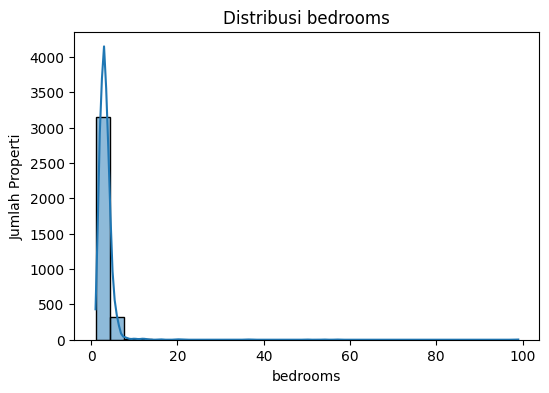

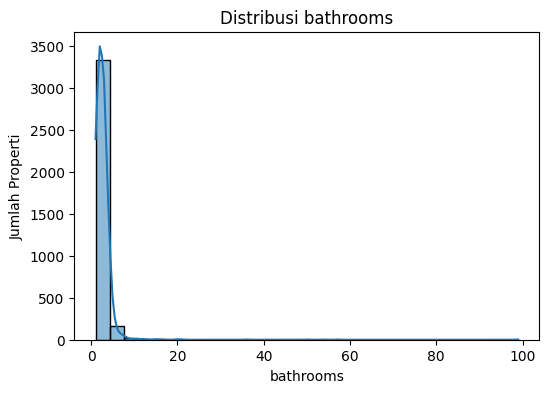

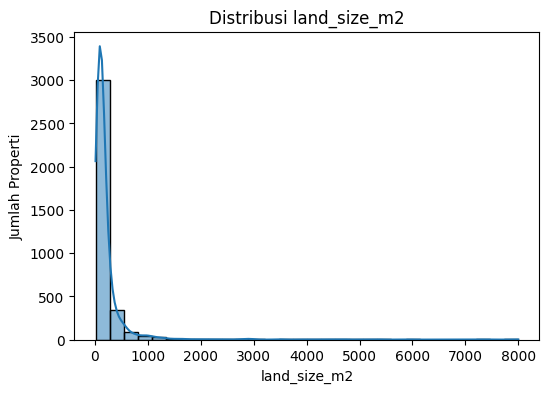

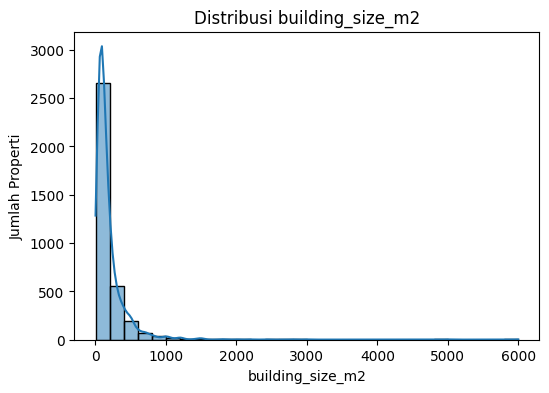

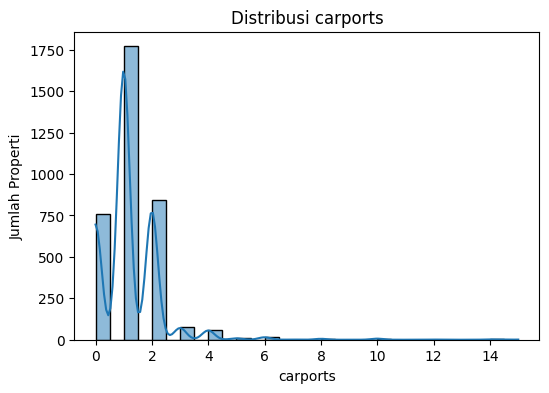

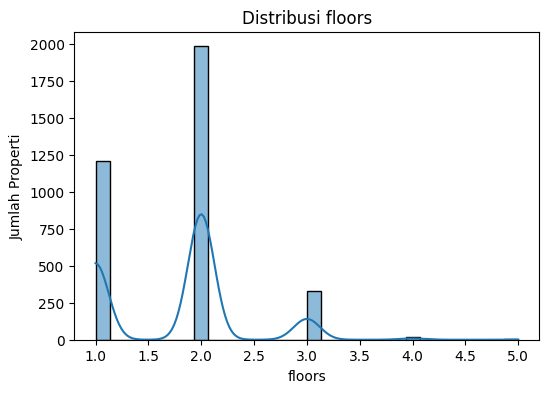

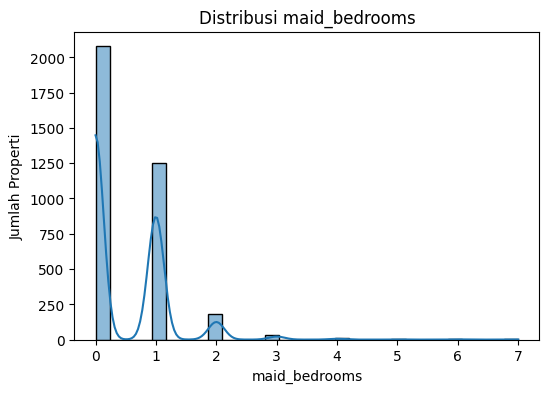

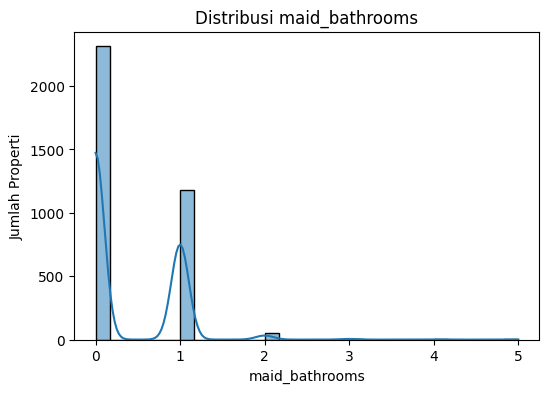

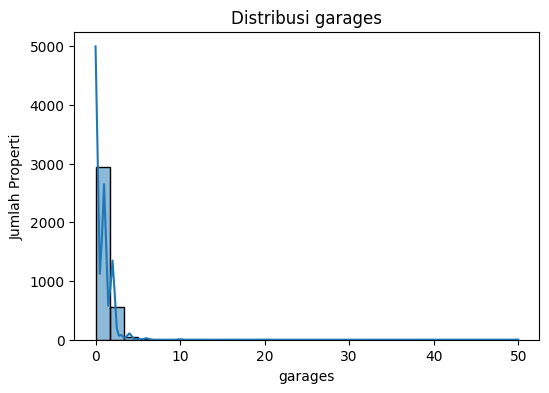

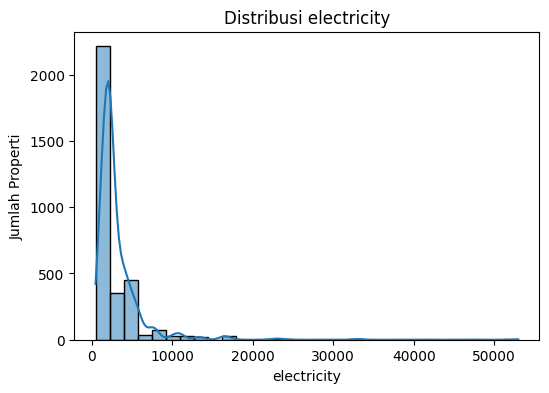

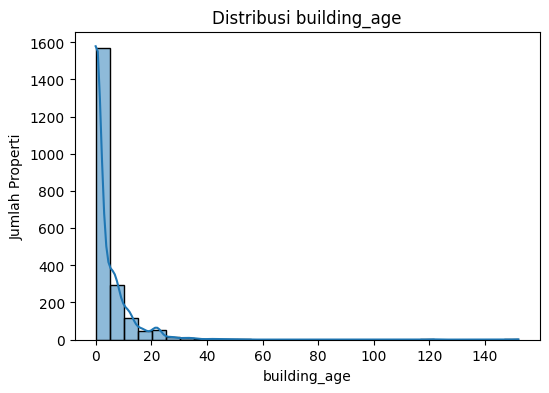

In [24]:
numeric_cols = ['bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2',
                'carports', 'floors', 'maid_bedrooms', 'maid_bathrooms',
                'garages', 'electricity', 'building_age']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_clean[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah Properti')
    plt.show()

Insight

---

- plot kamar tidur
> Mayoritas rumah memiliki 2 hingga 3 kamar tidur. Distribusi relatif normal, namun terdapat sedikit rumah dengan jumlah kamar ekstrem (>6), yang menunjukkan variasi pada segmen properti skala besar.


- plot kamar mandi
> Rumah umumnya memiliki 1–2 kamar mandi. Outlier terjadi pada rumah dengan 5 atau lebih kamar mandi, yang kemungkinan merupakan properti mewah atau komersial.

- plot luas tanah
> Sebagian besar rumah memiliki luas tanah di bawah 200 m². Distribusi ini juga miring ke kanan, dengan outlier berupa rumah yang memiliki lahan sangat luas (>1000 m²). Ini mencerminkan adanya variasi tinggi pada segmen properti lahan besar yang perlu ditangani dalam modeling.

- plot luas bangunan
> Rumah umumnya memiliki luas bangunan antara 50 hingga 250 m². Beberapa properti dengan luas lebih dari 500 m² teridentifikasi sebagai outlier. Distribusi ini memperkuat pentingnya normalisasi atau transformasi saat pelatihan model prediktif.

- plot carports dan plot garasi
> Rumah pada umumnya memiliki 1 carport atau garasi. Properti dengan lebih dari 2 carport sangat jarang, menunjukkan bahwa fitur ini cukup spesifik untuk rumah mewah atau kavling besar.

- plot lantai
> Distribusi jumlah lantai menunjukkan bahwa mayoritas rumah adalah bertingkat 1 atau 2. Rumah dengan lebih dari 3 lantai sangat jarang, dan kemungkinan termasuk properti khusus seperti kos atau bangunan campuran.

- plot kamar ART dan plot kamar mandi ART
> Sebagian besar rumah tidak memiliki kamar khusus ART. Jika pun ada, jumlahnya 1 atau 2. Ini menunjukkan fitur ini lebih relevan untuk properti kelas atas.

- plot electicity
> Daya listrik rumah paling umum adalah antara 1.300 VA hingga 2.200 VA. Daya sangat tinggi (>4.400 VA) hanya dimiliki oleh sebagian kecil rumah, yang kemungkinan dilengkapi dengan fasilitas elektronik premium.

- plot umur bangunan
> Sebagian besar rumah berusia antara 0–20 tahun. Rumah dengan usia sangat tua (>40 tahun) sangat jarang dan dapat memengaruhi kondisi properti dan harga jualnya.

## **Fitur Kategorikal**

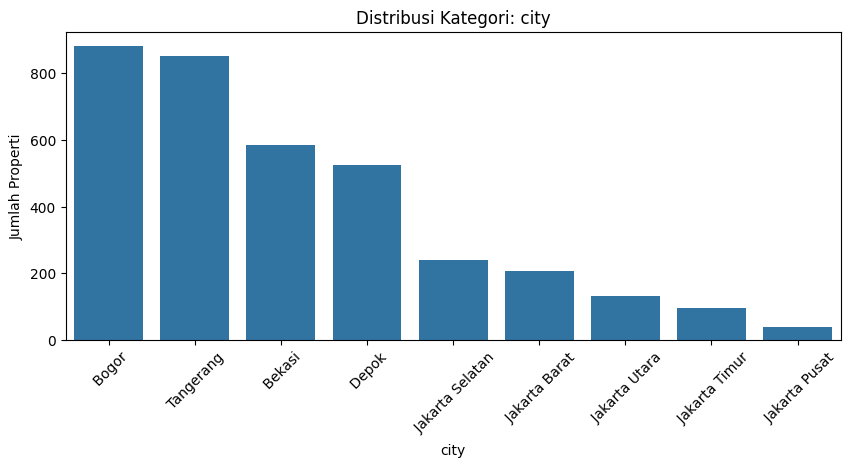

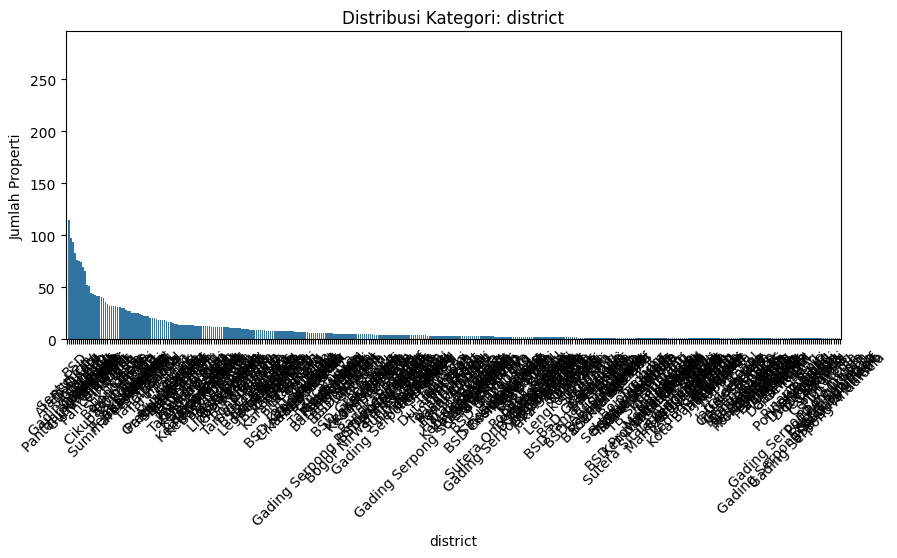

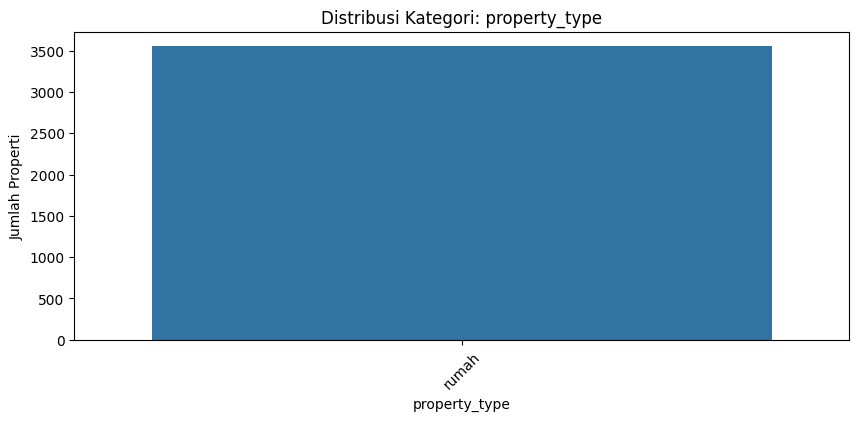

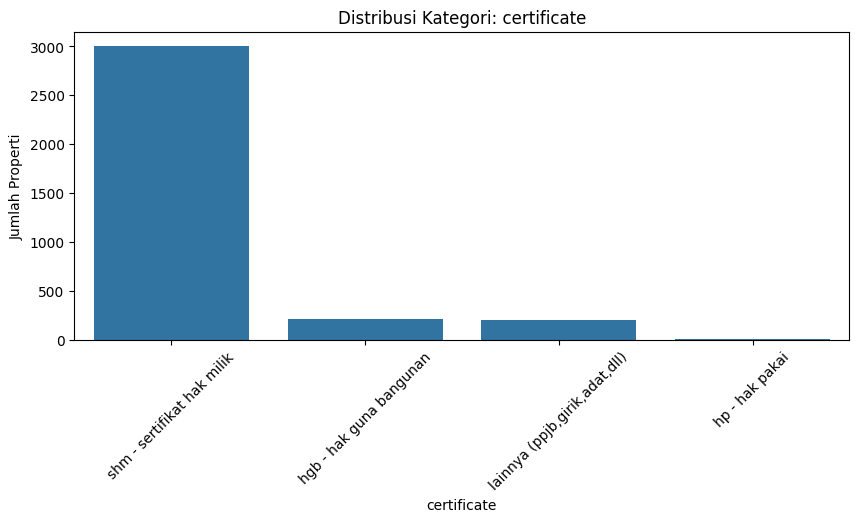

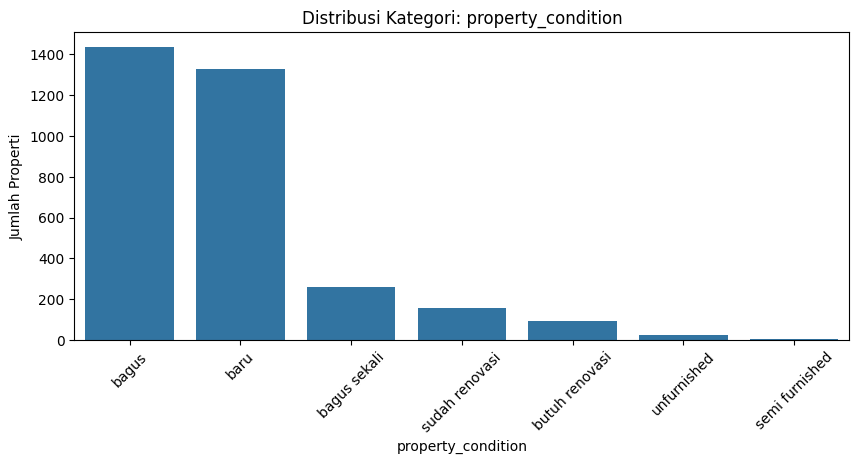

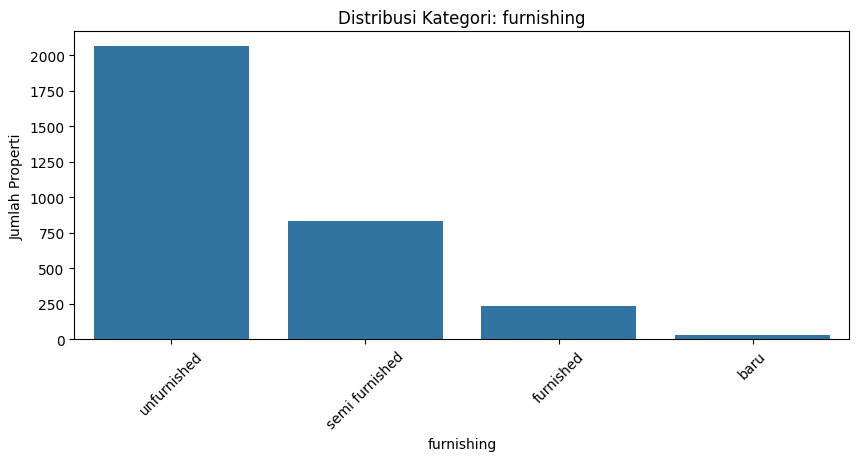

In [25]:
categorical_cols = ['city', 'district', 'property_type', 'certificate',
                    'property_condition', 'furnishing']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df_clean, x=col, order=df_clean[col].value_counts().index)
    plt.title(f'Distribusi Kategori: {col}')
    plt.xticks(rotation=45)
    plt.ylabel('Jumlah Properti')
    plt.show()

Insight

---
- plot kota
> Kota dengan jumlah properti terbanyak adalah Bekasi dan Tangerang, disusul oleh Depok dan Jakarta. Ini menunjukkan ekspansi pasar properti di wilayah penyangga Ibu Kota.

- plot distrik
> Sebaran wilayah memperlihatkan konsentrasi listing rumah pada wilayah pinggiran

- plot tipe
> hanya ada 1 variabel yaitu "rumah"

- plot sertifikat
> SHM (Sertifikat Hak Milik) merupakan sertifikat yang paling banyak ditemukan, menunjukkan legalitas properti yang kuat dan siap transaksi.

- plot kondisi
> Sebagian besar rumah dikategorikan dalam kondisi “Bagus”. Ini mencerminkan upaya pemilik atau agen untuk menampilkan properti dalam kondisi layak huni.

- plot furnishing
> Rumah unfurnished mendominasi iklan properti, disusul oleh semi-furnished. Furnished hanya sebagian kecil, biasanya ditujukan untuk apartemen atau rumah siap huni.

# **EDA Multivariate**

## **Korelasi matriks**

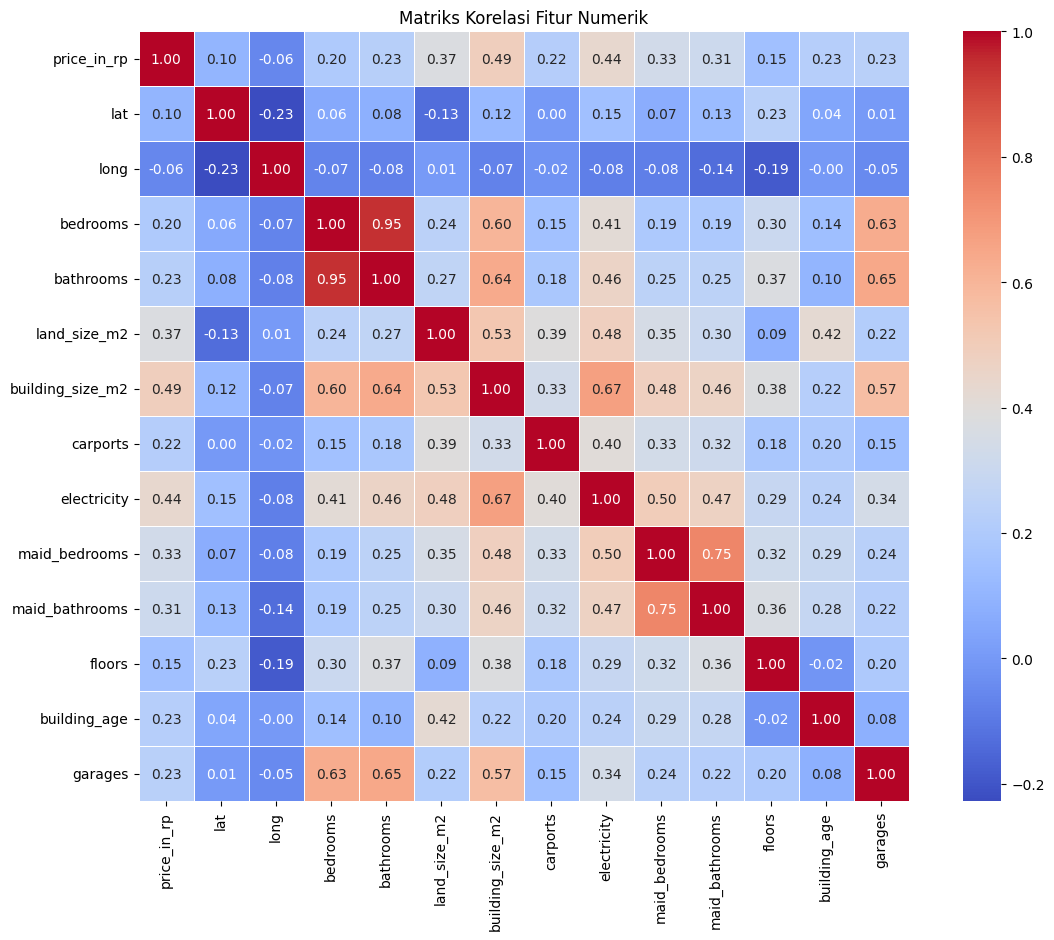

In [26]:
plt.figure(figsize=(14, 10))
corr = df_clean.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

insight

---
Dari plot heatmap diatas dapat kita lihat ada hubungan erat antara 'price_in_rp' dengan 'building_size_m2' (0.49) dan ectricity (0.44). Dan juga antara 'building_size_m2' dengan 'electricity' (0.67) yang menunjukan bahwa makin besar sebuah bangunan, semakin besar juga listrik yang dibutuhkan

## **harga rata rata perkota**

<ipython-input-27-1776389248>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_city = df_clean.groupby('city')['price_in_rp'].mean().sort_values(ascending=False)


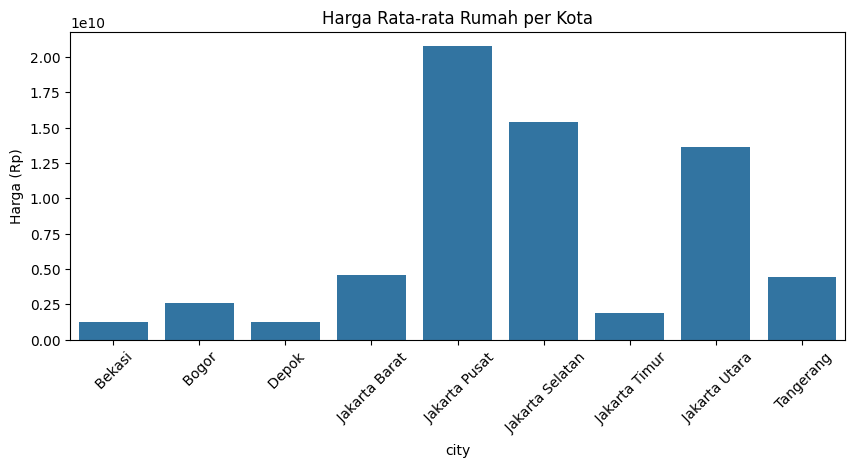

In [27]:
plt.figure(figsize=(10, 4))
avg_price_city = df_clean.groupby('city')['price_in_rp'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_city.index, y=avg_price_city.values)
plt.title('Harga Rata-rata Rumah per Kota')
plt.ylabel('Harga (Rp)')
plt.xticks(rotation=45)
plt.show()

Insight

---

Berdasarkan grafik harga rata-rata rumah per kota, terlihat bahwa Jakarta Pusat memiliki nilai properti tertinggi, disusul oleh Jakarta Selatan dan Jakarta Utara. Sementara itu, kota-kota satelit seperti Bekasi, Depok, dan Bogor memiliki rata-rata harga yang jauh lebih rendah, mengindikasikan bahwa kawasan tersebut menjadi pilihan utama bagi pembeli rumah dengan budget terbatas. Hal ini menegaskan adanya disparitas harga antar wilayah yang signifikan di Jabodetabek.

## **Harga rata rata berdasarkan kondisi properti**

<ipython-input-28-4264000027>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_type = df_clean.groupby('property_condition')['price_in_rp'].mean().sort_values(ascending=False)


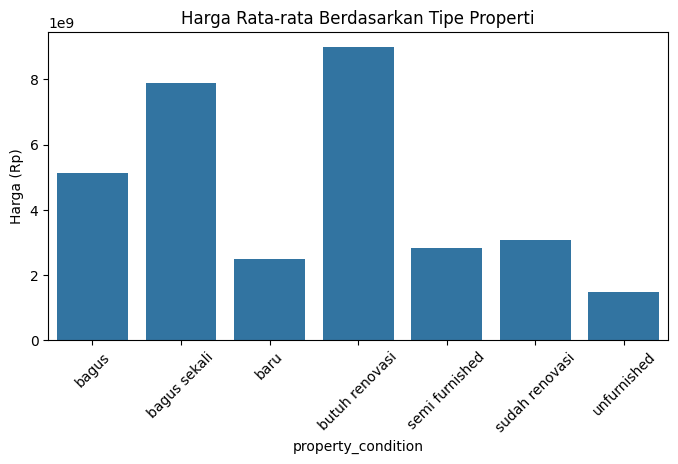

In [28]:
plt.figure(figsize=(8, 4))
avg_price_type = df_clean.groupby('property_condition')['price_in_rp'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_type.index, y=avg_price_type.values)
plt.title('Harga Rata-rata Berdasarkan Tipe Properti')
plt.ylabel('Harga (Rp)')
plt.xticks(rotation=45)
plt.show()

Insight

---

Dari plot diatas dapat kita lihat kalau harga rata-rata tertinggi dimiliki oleh properti yang membutuhkan renovasi. Hal ini mengindikasikan bahwa lokasi dan ukuran properti bisa jauh lebih menentukan harga dibandingkan kondisi fisik saat ini. Properti dalam kondisi “bagus sekali” dan “bagus” juga memiliki nilai tinggi, sejalan dengan ekspektasi. Sebaliknya, properti “baru”, “semi-furnished”, dan “unfurnished” memiliki harga rata-rata lebih rendah, kemungkinan besar karena berlokasi di kawasan dengan harga tanah lebih murah atau segmentasi pasar yang lebih rendah.

## **scatter ukuran vs harga**

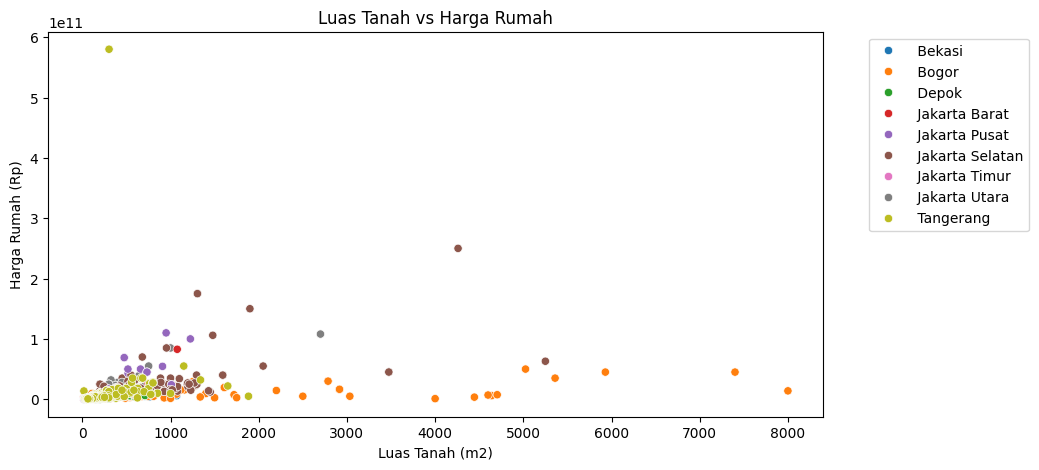

In [29]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_clean, x='land_size_m2', y='price_in_rp', hue='city')
plt.title('Luas Tanah vs Harga Rumah')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Rumah (Rp)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight

---

Grafik Luas Tanah vs Harga Rumah menunjukkan bahwa terdapat hubungan positif antara luas lahan dan harga rumah, meskipun tidak bersifat linier. Beberapa properti berharga tinggi meskipun memiliki lahan kecil, terutama di Jakarta Pusat dan Selatan, menandakan bahwa lokasi menjadi faktor dominan. Sebaliknya, rumah dengan luas tanah besar di wilayah seperti Bogor dan Tangerang cenderung memiliki harga yang lebih rendah. Hal ini mengindikasikan bahwa strategi prediksi harga rumah perlu mempertimbangkan interaksi antara ukuran fisik dan lokasi properti.

# Data Preparation

## **handling missing value**

In [30]:
df_clean.isnull().sum()

,0
price_in_rp,0
district,0
city,0
lat,0
long,0
facilities,0
property_type,1
bedrooms,34
bathrooms,29
land_size_m2,2


karena missing value kolom 'building_age' dan 'building_orientation' lebih banyak jadi kita bisa melakukan drop kolom

In [31]:
# Drop kolom dengan missing value > 40%
df_clean.drop(columns=['building_age', 'building_orientation'], inplace=True)

dan juga untuk 'property_type' yang missing valuenya 1, kita juga bisa drop 1 baris yang memiliki missing value

In [32]:
# Drop baris dengan missing kecil
df_clean.dropna(subset=['property_type'], inplace=True)

kita bisa menggunakan median untuk kolom numerik yuang memiliki missing value

In [33]:
# Imputasi numerik dengan median
median_cols = ['bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'floors', 'electricity']
for col in median_cols:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

<ipython-input-33-1520474794>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
<ipython-input-33-1520474794>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

sedangkan untuk kolom kategori, kita bisa menggunakan modus

In [34]:
# Imputasi kategorik dengan modus
mode_cols = ['certificate', 'property_condition', 'furnishing']
for col in mode_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

<ipython-input-34-2412131671>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


Mengapa kolom numerik menggunakan median dan ketegori menggunakan modus ?

Untuk menghindari kehilangan data berharga akibat penghapusan baris, serta menjaga distribusi agar tidak bias. Oleh karena itu kita menggunakan median dan modus

In [35]:
df_clean.isnull().sum()

,0
price_in_rp,0
district,0
city,0
lat,0
long,0
facilities,0
property_type,0
bedrooms,0
bathrooms,0
land_size_m2,0


In [36]:
df_clean.head()

,price_in_rp,district,city,lat,long,facilities,property_type,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,property_condition,garages,furnishing
0,2.990000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,4,4,239.0,272.0,0,shm - sertifikat hak milik,4400,0,1,2,bagus,0,unfurnished
1,1.270000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,3,2,55.0,69.0,1,hgb - hak guna bangunan,2200,0,0,2,bagus,0,unfurnished
2,1.950000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,3,3,119.0,131.0,1,hgb - hak guna bangunan,2200,1,1,2,bagus,1,unfurnished
3,3.300000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,3,3,180.0,174.0,0,shm - sertifikat hak milik,3500,1,1,2,bagus sekali,2,unfurnished
4,4.500000e+09,Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,4,3,328.0,196.0,2,shm - sertifikat hak milik,3500,1,1,2,bagus,1,unfurnished


## **Eda Final**

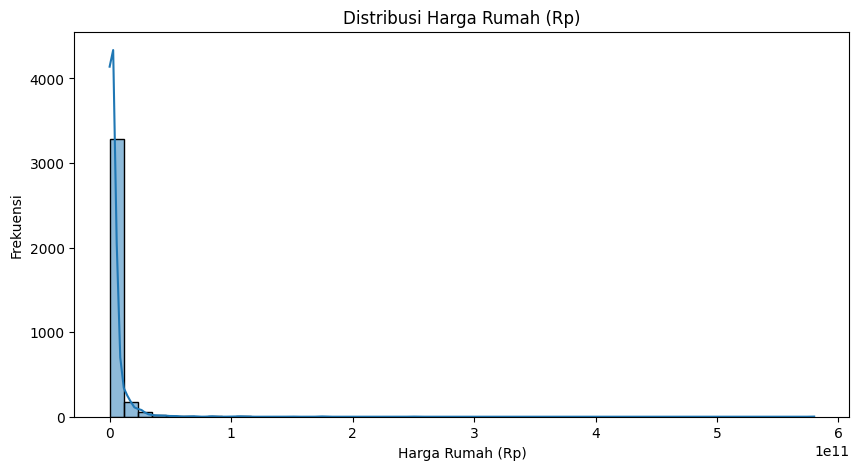

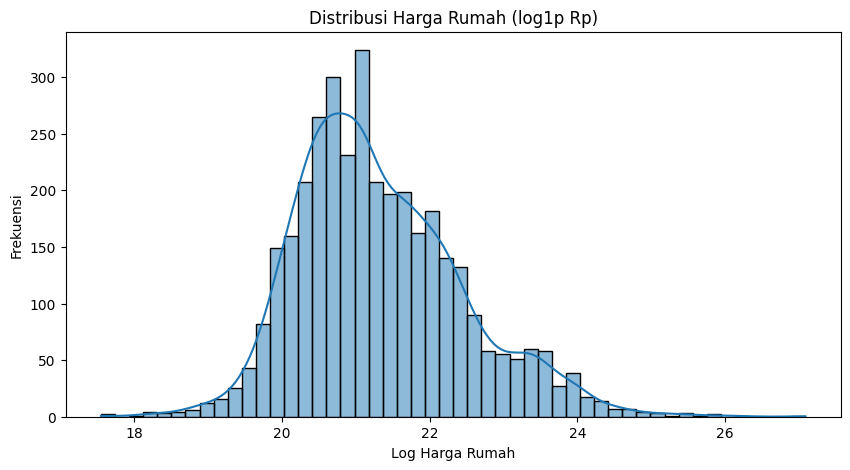

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['price_in_rp'], bins=50, kde=True)
plt.title('Distribusi Harga Rumah (Rp)')
plt.xlabel('Harga Rumah (Rp)')
plt.ylabel('Frekuensi')
plt.show()

# Log Transform
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df_clean['price_in_rp']), bins=50, kde=True)
plt.title('Distribusi Harga Rumah (log1p Rp)')
plt.xlabel('Log Harga Rumah')
plt.ylabel('Frekuensi')
plt.show()

#**Feature Engineering**

In [38]:
# Buat kolom baru untuk harga log
df_clean['price_log'] = np.log1p(df_clean['price_in_rp'])

In [39]:
df_model = df_clean.copy()

# One-hot encoding
df_model = pd.get_dummies(df_model, columns=[
    'city', 'property_type', 'certificate',
    'furnishing', 'property_condition'
], drop_first=True)

In [40]:
df_model = df_model.drop(columns=[
    'price_in_rp', 'facilities', 'lat', 'long', 'district'
])

## Splitting

Untuk membuat model, kita membagi data menjadi 2 yaitu data training (80%) dan data testing (20%)

In [41]:
X = df_model.drop(columns='price_log')
y = df_model['price_log']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Model

Untuk perbandingan, saya membuat model menggunakan 2 algoritma
- Linear Regression
- Random Forest

Mengapa menggunakan Linear Regression dan Random Forest ?
> Linear Regression digunakan sebagai baseline karena sederhana, cepat, dan mudah diinterpretasi

>Random Forest digunakan karena memiliki kelebihan, yaitu Akurat untuk data non-linear dan Tidak rentan overfitting

In [43]:
lr = LinearRegression(
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False
)
lr.fit(X_train, y_train)


LinearRegression()

In [44]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_jobs=-1, random_state=42)

# Eval

In [45]:
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression R²: {r2_lr}")

Linear Regression RMSE: 0.5816430406755284
Linear Regression R²: 0.7410411747685459


In [46]:
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R²: {r2_rf}")

Random Forest RMSE: 0.3865416714923684
Random Forest R²: 0.8856304836559896


Insight

---

Bisa dilihat dari evaluasi diatas, hasil yang didapat adalah

| Model               | RMSE         | R² Score  |
|---------------------|--------------|-----------|
| Linear Regression   | 1.08e+09     | 0.6324    |
| Random Forest       | 7.01e+08     | 0.8043    |

Dari tabel diatas, dapat dibuktikan kalau Random Forest bagus untuk dijadikan alogirma model


## **Visualisasi**

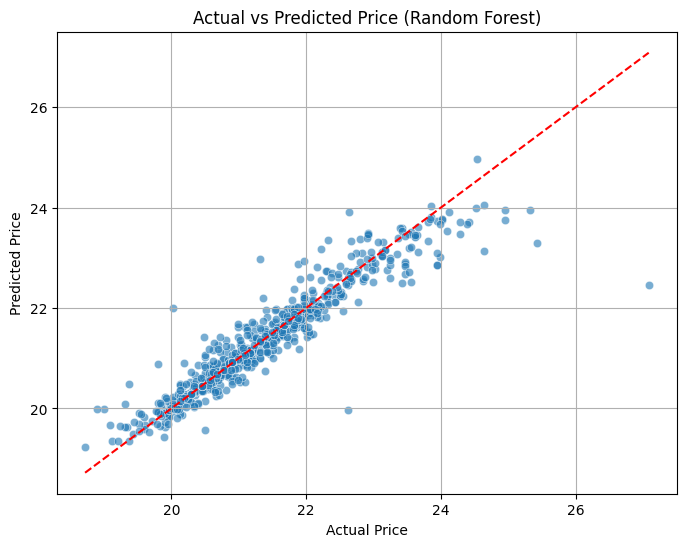

In [47]:
y_pred = rf.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis ideal
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Random Forest)")
plt.grid(True)
plt.show()

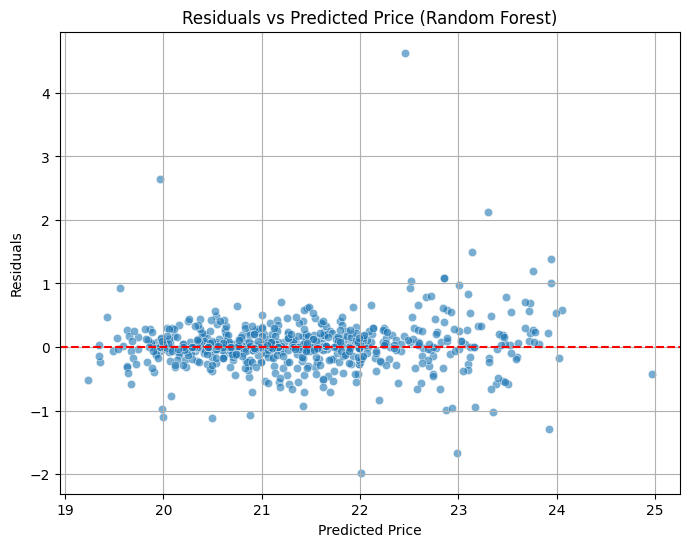

In [48]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Price (Random Forest)")
plt.grid(True)
plt.show()

# Save Model

In [49]:
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

# Fitur Utama

## **Fungsi Prediksi**

In [50]:
def predict_price(user_input: dict, model, feature_columns):
    df_input = pd.DataFrame([user_input])
    df_input = df_input[feature_columns]
    log_price = model.predict(df_input)[0]
    price = np.expm1(log_price)
    return round(price)

## **Fungsi Rekomendasi**

In [51]:
def recommend_houses(budget, df_original, top_n=5, tolerance=0.10):
    min_price = budget * (1 - tolerance)
    max_price = budget * (1 + tolerance)

    filtered = df_original[
        (df_original['price_in_rp'] >= min_price) &
        (df_original['price_in_rp'] <= max_price)
    ].sort_values(by='price_in_rp').head(top_n)

    return filtered[['district', 'city', 'bedrooms', 'bathrooms', 'land_size_m2',
                     'building_size_m2', 'price_in_rp', 'certificate', 'furnishing']]

## Model Testing

pada code ini saya akan mencoba testing, apakah model dapat merekomendasikan sesuai harga yang user input

In [52]:
budget_user = input("Masukkan budget Anda (dalam Rupiah): ")

try:
  budget_user = int(budget_user)
  recommended_df = recommend_houses(budget_user, df_clean, top_n=5)
  print(f"\n📌 Rekomendasi Rumah Untuk Budget Rp {budget_user:,.0f}:\n")
  if not recommended_df.empty:
    print(recommended_df.to_string(index=False))
  else:
    print("Tidak ada rumah yang ditemukan dalam rentang budget Anda.")
except ValueError:
  print("Input tidak valid. Harap masukkan angka untuk budget.")

Masukkan budget Anda (dalam Rupiah): 10000000

📌 Rekomendasi Rumah Untuk Budget Rp 10,000,000:

Tidak ada rumah yang ditemukan dalam rentang budget Anda.


In [53]:
budget_user = input("Masukkan budget Anda (dalam Rupiah): ")

try:
  budget_user = int(budget_user)
  recommended_df = recommend_houses(budget_user, df_clean, top_n=5)
  print(f"\n📌 Rekomendasi Rumah Untuk Budget Rp {budget_user:,.0f}:\n")
  if not recommended_df.empty:
    print(recommended_df.to_string(index=False))
  else:
    print("Tidak ada rumah yang ditemukan dalam rentang budget Anda.")
except ValueError:
  print("Input tidak valid. Harap masukkan angka untuk budget.")

Masukkan budget Anda (dalam Rupiah): 100000000

📌 Rekomendasi Rumah Untuk Budget Rp 100,000,000:

   district   city  bedrooms  bathrooms  land_size_m2  building_size_m2  price_in_rp                certificate  furnishing
Bojong Gede  Bogor         2          1          55.0              36.0  100000000.0 shm - sertifikat hak milik unfurnished
Bojong Gede  Bogor         2          1          55.0              36.0  100000000.0 shm - sertifikat hak milik unfurnished
Bojong Gede  Bogor         2          1          55.0              36.0  100000000.0 shm - sertifikat hak milik unfurnished
